In [1]:
import torch
import torchvision.transforms as TT
import matplotlib.pyplot as plt

In [24]:
import torchvision.transforms as TT

def cut_to_mnist(multi_img, merge_points, multi_img_label):
    mnist_images = []
    top_vertical = 0
    top_horizontal = 0
    crop_height = 28
    crop_width = 0
    for mp in merge_points:
        mp = int(mp)
        mnist_images.append(TT.functional.crop(multi_img, top=top_vertical, left=top_horizontal, height=crop_height, width=mp-top_horizontal))
        top_horizontal = mp
    labels = [c for c in str(multi_img_label)]

    return mnist_images, labels

{'multi_img': tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), 'multi_img_label': '2312', 'merge_points': tensor([21., 45., 67., 93.])}
mr["multi_img"].shape : torch.Size([1, 28, 112])
merge_points: tensor([21., 45., 67., 93.])


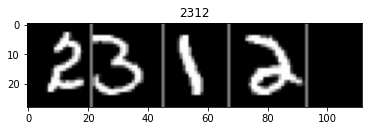

In [25]:
# load example image:
import torchvision.transforms as TT
import matplotlib.pyplot as plt
from PIL import ImageDraw # used to draw lines on an image

mr = torch.load("test4/2312_21_45_67_93.pt")
print(mr)

t_img = mr["multi_img"]
print(f"mr[\"multi_img\"].shape : {t_img.shape}")

merge_points = mr["merge_points"]
print(f"merge_points: {merge_points}")

img = TT.ToPILImage()(mr["multi_img"])
plt.title(mr["multi_img_label"])
draw = ImageDraw.Draw(img)
for mp in merge_points:
    draw.line([(mp, 0), (mp, 28)], width=1, fill=128)
plt.imshow(img, cmap="gray")

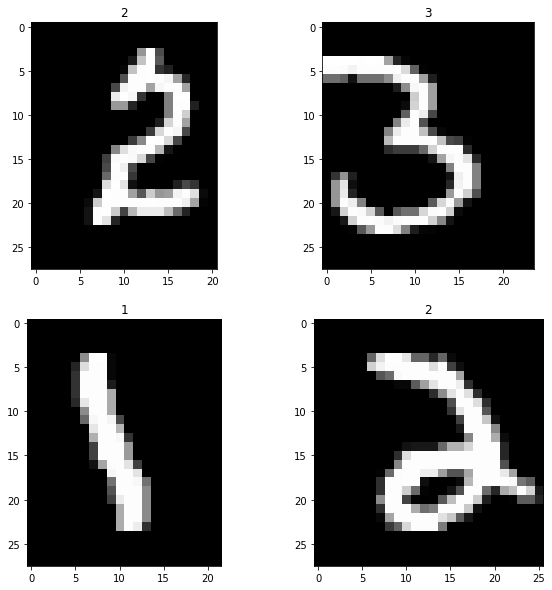

In [26]:
# test cut_to_mnist() by displaying the single images:

import torchvision.transforms as TT
import matplotlib.pyplot as plt

torch_image_record = torch.load("test4/2312_21_45_67_93.pt")
torch_image = torch_image_record["multi_img"]
merge_points = torch_image_record["merge_points"]
multi_img_label = torch_image_record["multi_img_label"]

torch_single_imgs, labels = cut_to_mnist(torch_image, merge_points, multi_img_label)

figure = plt.figure(figsize=(10,10))
rows, cols = 2,2
for i in range(1, cols * rows +1):
    img = torch_single_imgs[i-1]
    label = labels[i-1]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis="off"
    plt.imshow(img.squeeze(), cmap="gray")